# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains 10,000 records of movies from The Movie Database (TMDb). 
There are many columns within this datatset. Both the id and imdb_id provide unique identifiers or IDs for each record. The budget, budget_adj, revenue, and revenue_adj represent the budget, adjusted budget, revenue, and adjusted revenue for each record, respectively. The columns for cast, director, and production_companies describe who worked on the movie, such as the actors, director, and companies that worked on production of the film, respectively. The release_year column and release_date represent the data information for the film. The column release_year is the year the film was released, while the release_date gives the specific day, month, and year the film was released. The runtime	column denotes how long the movie is in number of minutes. The column for genres provides a lsit of different genres that describe the film. The popularity, vote_count, and vote_average hold data regarding how popular the film was, how many votes were counted, and the average score of each vote counted.The columns for original_title, tagline, overview, and homepage provide descriptive information for the film. The original_title is what the name of the film is. The tagline is the slogan or phrase used to market the film. The overview provides a quick synopsis for the film. The homepage is the URL for a website that helps promote and/or provide information on the film.

### Question(s) for Analysis

**Question 1**: What are the tope 5 years had the highest average revenue and adjusted revenue?
**Question 2**: Is there a positive or negative trend with the highest and lowest budgets for films from 2005-2015?

In [1]:
import pandas as pd
import numpy as np

<a id='wrangling'></a>
## Data Wrangling

In [2]:
#load data and print a few lines
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#print data types of the dataset
df_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [4]:
#count the number of films recorded for each year in the dataset
df_movies['id'].groupby(df_movies['release_year']).count()

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    490
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

In [5]:
#get info on each column of the dataset
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#get the shape of the dataset
df_movies.shape

(10866, 21)


### Data Cleaning
 

In [7]:
#check if there are any rows/records with null values in the dataset
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
#drop rows with any null values
df_movies.dropna(inplace=True)
#check if there are any rows with null values (should be FALSE)
df_movies.isnull().sum().any()

False

In [9]:
#check if there are any duplicates in the dataset (should be 0)
print(df_movies.duplicated().sum())

0


In [10]:
#clean imdb_id by changing data type from object -> int64
df_movies['imdb_id'] = df_movies['imdb_id'].str.extract('tt(\d+)').astype('int64')
df_movies.dtypes

id                        int64
imdb_id                   int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [11]:
#change data types of cast, genres, and production_companies
df_movies['genres'] = df_movies['genres'].astype("category")

#check if change for genres to cateogry data type was successful
df_movies.dtypes

id                         int64
imdb_id                    int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
homepage                  object
director                  object
tagline                   object
keywords                  object
overview                  object
runtime                    int64
genres                  category
production_companies      object
release_date              object
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

In [12]:
#check shape of data after clean up
df_movies.shape

(1992, 21)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Top 5 Years with the Highest Revenue/Adjusted Revenue)

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#get average revenue by year
avg_yearly_revenue = df_movies['revenue'].groupby(df_movies['release_year'], group_keys=True).mean().apply(lambda x:x)

In [14]:
#get the top 5 highest average revenues
avg_yearly_revenue.nlargest(5,'first')

release_year
1977    3.202789e+08
1973    3.015420e+08
1997    3.008943e+08
1980    2.798892e+08
1982    2.798207e+08
Name: revenue, dtype: float64

In [15]:
#get the average revenue_adj by year
avg_yearly_adj_revenue = df_movies['revenue_adj'].groupby(df_movies['release_year'], group_keys=True).mean().apply(lambda x:x)

In [16]:
#get the top 5 highest average revenue_adj
avg_yearly_adj_revenue.nlargest(5,'first')

release_year
1973    1.480921e+09
1972    1.277914e+09
1977    1.152293e+09
1965    9.771535e+08
1975    7.949339e+08
Name: revenue_adj, dtype: float64

In [17]:
#define function for making a bar graph
def bar_plot(arg1,arg2,arg3,arg4):
    revenue_bar = arg1.nlargest(5,'first')
    revenue_bar.plot(kind='bar',
                 figsize=(5,5),
                 color=arg2,
                 title=arg3,
                 xlabel='Year of Release',
                 ylabel=arg4)

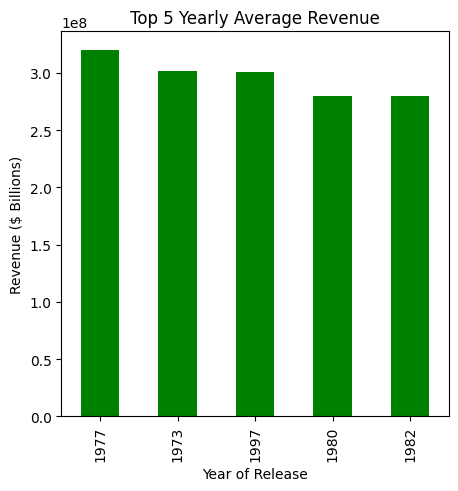

In [18]:
#make a bar graph for the top 5 highest average revenue
bar_plot(avg_yearly_revenue, 'green', 'Top 5 Yearly Average Revenue', 'Revenue ($ Billions)')

This bar graph shows the top 5 release years in terms of yearly average revenue. As shown, 1977 is the release year with the highest average revenue and 1982 is the release year with the lowest average revenue.

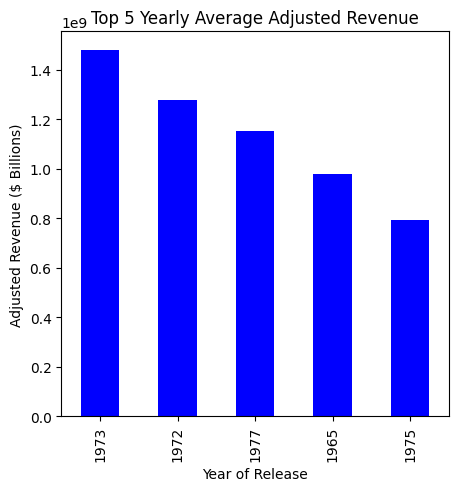

In [19]:
#make a bar graph for the top 5 highest average adjusted revenue
bar_plot(avg_yearly_adj_revenue, 'blue', 'Top 5 Yearly Average Adjusted Revenue', 'Adjusted Revenue ($ Billions)')

This bar graph shows the top 5 release years in terms of yearly average adjusted revenue. As shown, 1973 is the release year with the highest average adjusted revenue and 1975 is the release year with the lowest average adjusted revenue.

### Research Question 2  (Trends of Highest and Lowest Budgets from 2005-2015)

In [20]:
#get the number of movies released per year (2005-2015)
number_of_movies = df_movies['release_year']

<AxesSubplot: ylabel='Frequency'>

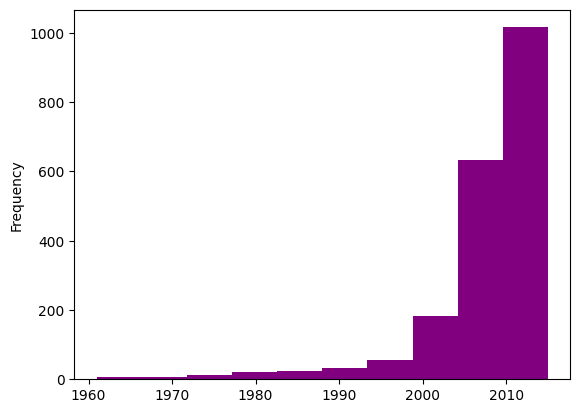

In [21]:
#plot histogram of number_of_movies_2005_2015
number_of_movies.plot.hist(bins=10, color='purple')

This histogram plots the distrubtion of the number of the films by release years. As shown, the amount of films released appears to skew more towards the latter years around and after the year 2000. The higher numer of movies released around 2000 and after means there are more data points to examine for further analysis.

In [22]:
#get the biggest movie budget collected from the years 2005-2015
yearly_releases_max_budget = df_movies.query('release_year>=2005 and release_year<=2015').groupby('release_year', group_keys=True)['budget'].max()

In [23]:
#define function for making a line plot
def line_plot(arg1,arg2,arg3,arg4):
    arg1.plot(title=arg2, 
              xlabel=arg3, 
              ylabel=arg4)

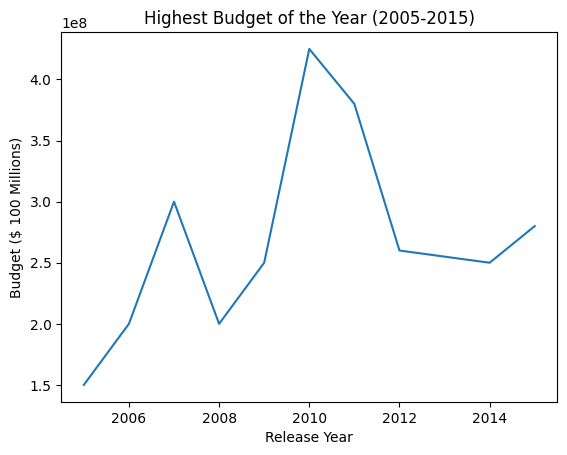

In [24]:
# make a scatter plot of max_budget data
line_plot(yearly_releases_max_budget, 'Highest Budget of the Year (2005-2015)', 'Release Year', 'Budget ($ 100 Millions)')

This line graph plots the highest budget of the release years 2005-2015. As shown, the trend of the maximum budget of each year is in a positive direction. 

In [25]:
#get the smallest movie budget collected from the years 2005-2015
yearly_releases_min_budget = df_movies.query('release_year>=2005 and release_year<=2015 and budget>0').groupby('release_year')['budget'].min()

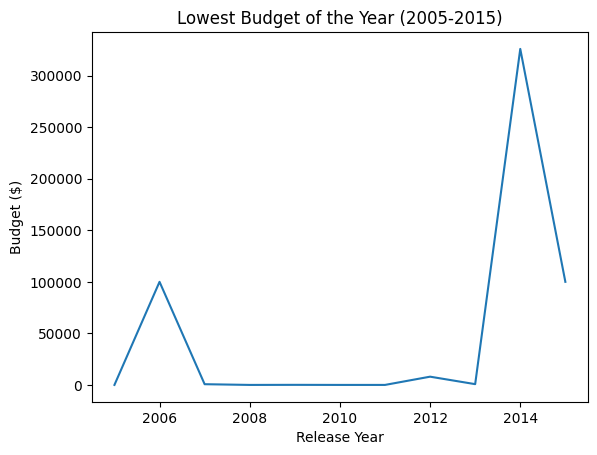

In [26]:
#make scatter plot of min budget data
line_plot(yearly_releases_min_budget, 'Lowest Budget of the Year (2005-2015)', 'Release Year', 'Budget ($)')

This line graph plots the lowest budget of the release years 2005-2015. As shown, the trend of the lowest budget above 0 dollars of each year is in a positive direction. 

<a id='conclusions'></a>
## Conclusions

**Research Question 1**: From the dataset given, the results demonstrate 2 outcomes for the revenue and adjusted revenue. The top 5 years with the highest average revenue are 1977, 1973, 1997, 1980, and 1982. The top 5 years with the highest average adjsuted revenue are 1973, 1972, 1977, 1965, and 1975. It seems as though the years 1973 and 1977 remain in the top 5 highest average revenue, even after being adjusted for the revenue. Additional research can be conducted on the lowest revenue generating years for both revenue and adjusted revenue.

**Research Question 2**: From the dataset given, the trend for budgets from 2005-2015 was positive. This is because amongst the highest budgets for each year, there was a general trend towards an increase in budget. Amongst the lowest budget films that were made for more than no money (0), the general trend was towards an increase in budget as well. Additional research can be on the trend of the highest and lowest budget in a broader timeframe than 10 years.

<a id='limitations'></a>
## Limitations
One limitation to this exploration is the amount of films for each year. The earlier years, such as 1960, 1964, and 1968, have a fewer number of films that the later years, such as 2004, 2010, and 2014. A larger dataset that includes more films for the earlier years would help give a wider spread and representation of the data for films in the dataset.

In [27]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 479166 bytes to Investigate_a_Dataset.html
